In [25]:
%matplotlib inline
from sklearn.datasets import load_diabetes


In [26]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [27]:
print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.feature_names)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [28]:
import pandas as pd

In [29]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

In [30]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['MedianDiabetesValue'] = pd.Series(diabetes.target)

diabetes_df.head(5)

,age,sex,bmi,bp,...,s4,s5,s6,MedianDiabetesValue
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [31]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set_style('whitegrid')
sns.set(font_scale=2)

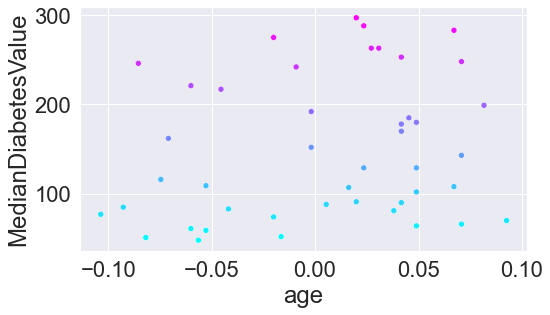

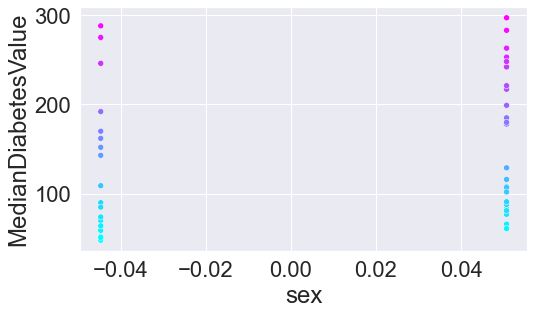

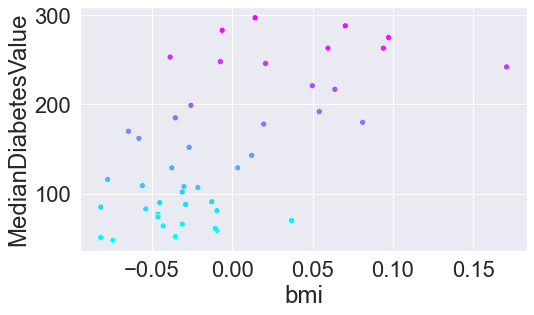

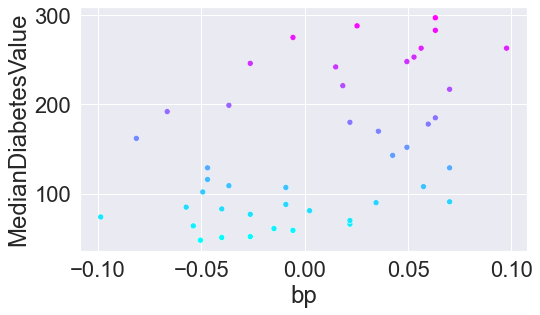

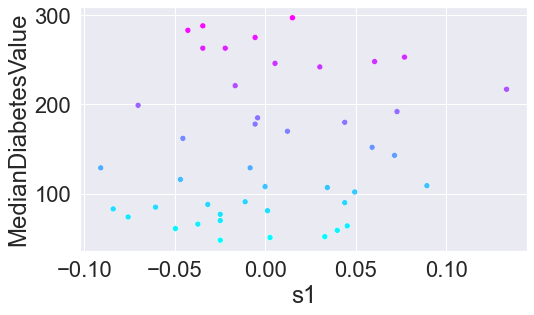

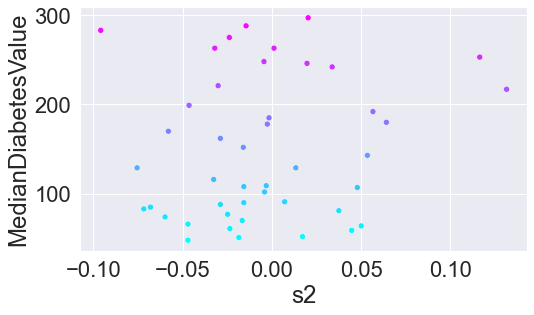

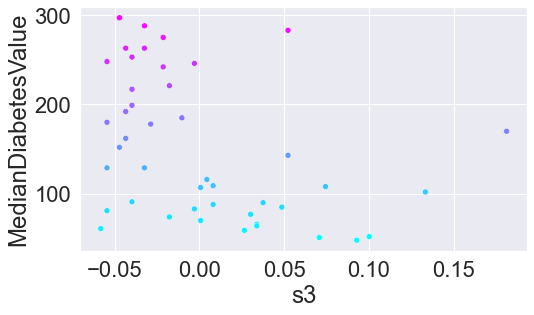

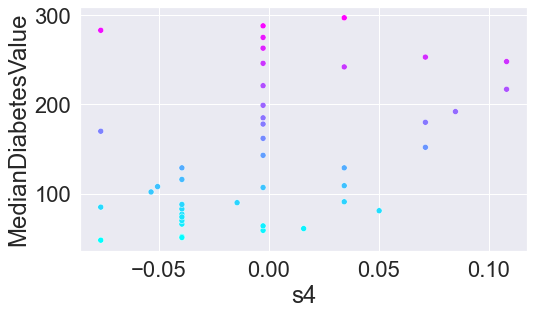

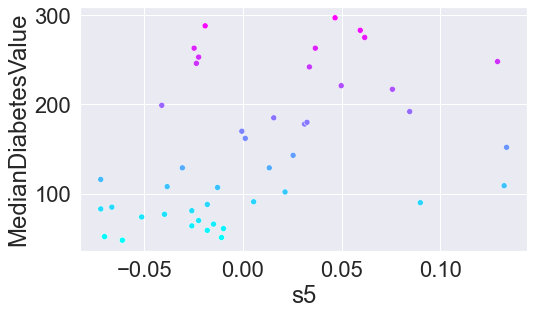

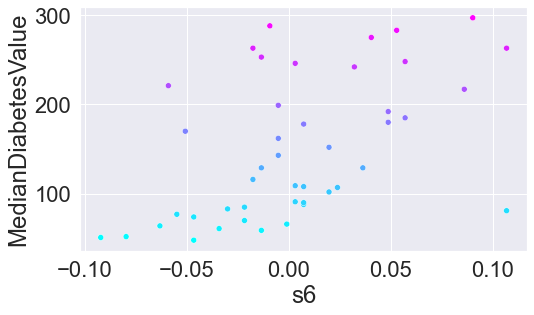

In [37]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8,4.5))
    sns.scatterplot(data=sample_df, x=feature,y="MedianDiabetesValue", hue='MedianDiabetesValue',palette='cool',legend=False)